In [1]:
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_v2_behavior
import tensorflow as tf
import os
import PIL

In [2]:
print(tf.__version__)

2.5.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PATH = "D:\\DATA_BASE\\cars_logo"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')
print("Train: ", train_dir) 
print("Test: ", validation_dir)

Train:  D:\DATA_BASE\cars_logo\train
Test:  D:\DATA_BASE\cars_logo\test


In [7]:
batch_size = 10
epochs = 1
IMG_HEIGHT = 70
IMG_WIDTH = 70

In [8]:
cols = []
for i in range(10):
    cols.append(os.listdir(train_dir)[i])
    print(os.listdir(train_dir)[i], "------->", os.listdir(validation_dir)[i])

Buick -------> Buick
Chery -------> Chery
Citroen -------> Citroen
Honda -------> Honda
Hyundai -------> Hyundai
Lexus -------> Lexus
Mazda -------> Mazda
Peugeot -------> Peugeot
Toyota -------> Toyota
VW -------> VW


In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           channel_shift_range=10.0,
                                           width_shift_range= 0.1,
                                           fill_mode="nearest", 
                                           brightness_range=(0.3, 0.9),
                                           horizontal_flip= False,
                                           validation_split = 0.2) # Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 1500 images belonging to 10 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

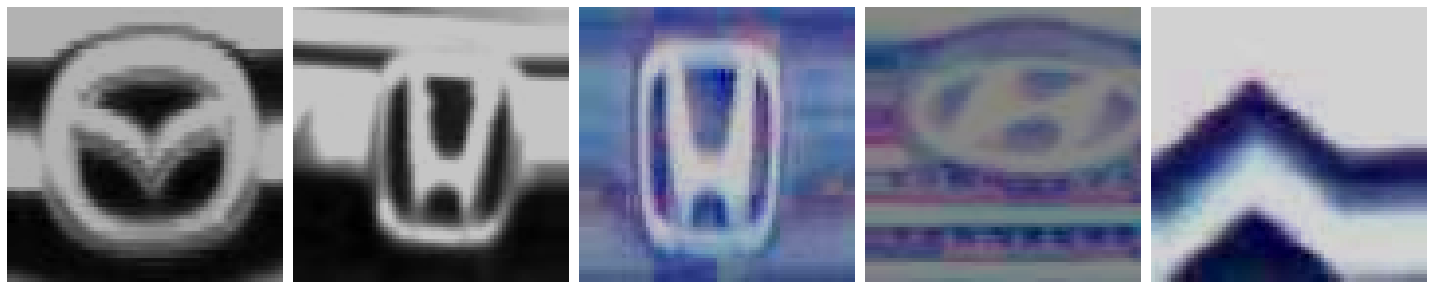

In [13]:
num = 5
def plotImages(images_arr):
    fig, axes = plt.subplots(1, num, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:num])

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(96, (11, 11),strides = 1, activation='relu',use_bias=True, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((3, 3), strides = 2))

model.add(layers.Conv2D(256, (5, 5), activation='relu',use_bias=True))
model.add(layers.MaxPooling2D((3, 3), strides = 2))

model.add(layers.Conv2D(384, (3, 3), activation='relu',use_bias=True))
model.add(layers.Conv2D(384, (3, 3), activation='relu',use_bias=True))
model.add(layers.Conv2D(256, (3, 3), activation='relu',use_bias=True))
model.add(layers.MaxPooling2D((3, 3), strides = 2))

# ASL_model.add(layers.Conv2D(128, (3, 3), activation='relu',use_bias=True))
model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu',use_bias=True))
model.add(layers.Dense(1024, activation='relu',use_bias=True))
# model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))


# ASL_model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         8

1000/1000 [==============================] - 270s 269ms/step - loss: 2.4413 - accuracy: 0.2188 - val_loss: 1.3036 - val_accuracy: 0.5667


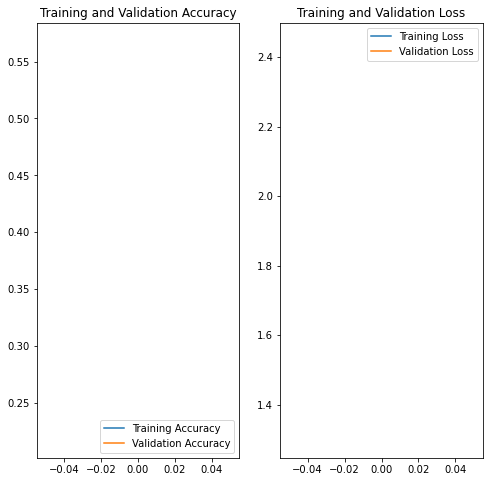

In [15]:
neuralNet = model.fit(
    train_data_gen,
    steps_per_epoch= (10000 // batch_size),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= (1500 // batch_size)
)
acc = neuralNet.history['accuracy']
val_acc = neuralNet.history['val_accuracy']

loss = neuralNet.history['loss']
val_loss = neuralNet.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
os.chdir('D:\Machine Learning\Demistifying_ML\Convoluted neural networks')
model.save("Car_logo_CNN.h5")

## Predictions

[6 5 8]
Mazda
Lexus
Toyota


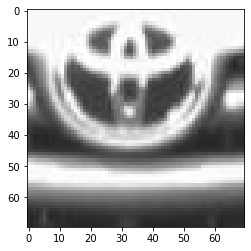

In [20]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = IMG_WIDTH, IMG_HEIGHT

# load the model we saved
model = load_model('D:\Machine Learning\Demistifying_ML\Convoluted neural networks\\Car_logo_CNN.h5')

# predicting images
img = image.load_img(r'D:\DATA_BASE\cars_logo\Test\Mazda\0001.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)

# Predicting multiple images at once
img = image.load_img(r'D:\DATA_BASE\cars_logo\Test\Lexus\0001.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)
plt.imshow(img)

img = image.load_img(r'D:\DATA_BASE\cars_logo\Test\Toyota\0001.jpg', target_size=(img_width, img_height))
w = image.img_to_array(img)
w = np.expand_dims(w, axis=0)
plt.imshow(img)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y, w])
classes = np.argmax(model.predict(images), axis=-1)

# classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)
for elem in classes:
    print(cols[elem])